In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Create the column for the dataset

In [4]:
col_names = ['UserId','ItemId','Rating','Timestamp']

# Read the csv file 
df = pd.read_csv('data.csv',sep='\t',names=col_names)

# TO check the dataset 
df.head()

,UserId,ItemId,Rating,Timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [10]:
# Grab the movie title CSV dataset 
mov_tit = pd.read_csv('movie_title.csv')
mov_tit.rename(columns= {'item_id':'ItemId'},inplace=True)

# TO print the head 
mov_tit.head()

,ItemId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


## Merging the dataframe 

In [11]:
df = pd.merge(df,mov_tit,on='ItemId')
df.head()

,UserId,ItemId,Rating,Timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Checking out the average rating for the movie

In [14]:
 df.groupby('title')['Rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: Rating, Length: 1664, dtype: float64

## To check the best rating movies 

In [15]:
df.groupby('title')['Rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: Rating, dtype: float64

## To check the most rating movies 

In [16]:
df.groupby('title')['Rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: Rating, dtype: int64

## To pass all the rating to a new dataframe 

In [17]:
ratings = pd.DataFrame(df.groupby('title')['Rating'].mean())
# To check the rating 
ratings.head()

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


## To create a row with number of people who rated 

In [18]:
ratings['NumberOfRatings'] = pd.DataFrame(df.groupby('title')['Rating'].count())
# To check the dataframe 
ratings.head()

,Rating,NumberOfRatings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## To visulaise the number of rating 

<AxesSubplot:xlabel='NumberOfRatings', ylabel='Count'>

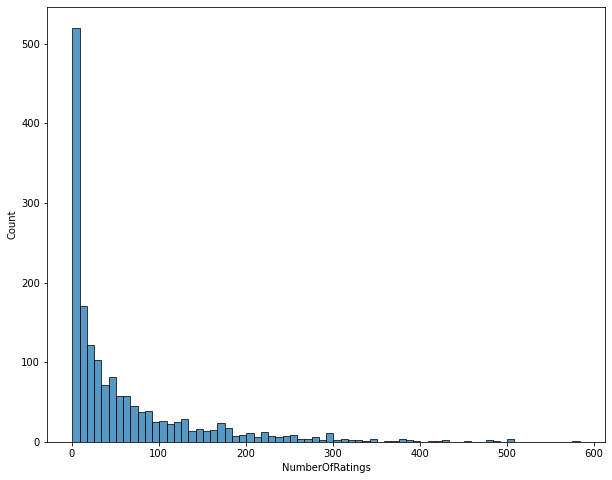

In [20]:
plt.figure(figsize=(10,8))
sns.histplot(ratings['NumberOfRatings'],bins=70)

## To check the actual Rating 

<AxesSubplot:xlabel='Rating', ylabel='Count'>

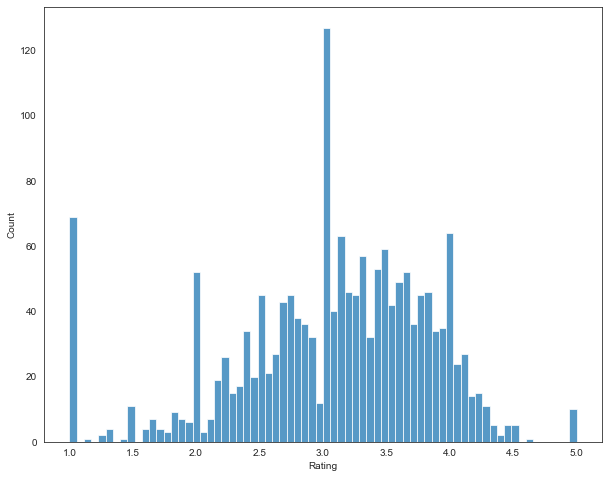

In [21]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.histplot(ratings['Rating'],bins=70)

## To check the actual rating vs number of ratings 

<Figure size 720x576 with 0 Axes>

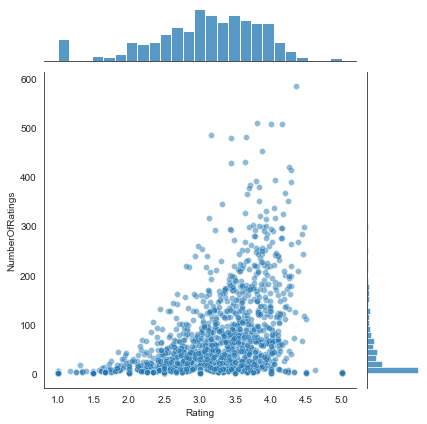

In [29]:
plt.figure(figsize=(10,8))
sns.set_style('white')
sns.jointplot(x='Rating',y='NumberOfRatings',data=ratings,alpha=0.5)